# El modelo epidémico de SIR
Una descripción matemática simple de la propagación de una enfermedad en una población es el llamado modelo SIR, que divide la población (fija) de N individuos en tres "compartimentos" que pueden variar en función del tiempo, t:

* S(t) son aquellos susceptibles pero aún no infectados con la enfermedad;
* I(t) es el número de individuos infecciosos;
* R(t) son aquellas personas que se han recuperado de la enfermedad y ahora tienen inmunidad.

El modelo SIR describe el cambio en la población de cada uno de estos compartimentos en términos de dos parámetros,  beta y  gamma.  
- Beta describe la tasa de contacto efectiva de la enfermedad: un individuo infectado entra en contacto con  beta*N otros individuos por unidad de tiempo (de los cuales la fracción que es susceptible a contraer la enfermedad es S/N).  
- Gamma es la tasa de recuperación promedio: es decir, 1/ gamma es el período de tiempo promedio durante el cual una persona infectada puede transmitirlo.

Las ecuaciones diferenciales que describen este modelo fueron derivadas primero por Kermack y McKendrick [ Proc. R. Soc. A , 115 , 772 (1927)]:

\begin{align*}
\frac{\mathrm{d}S}{\mathrm{d}t} &= -\frac{\beta S I}{N},\\
\frac{\mathrm{d}I}{\mathrm{d}t} &= \frac{\beta S I}{N} - \gamma I,\\
\frac{\mathrm{d}R}{\mathrm{d}t} &= \gamma I.
\end{align*}

El siguiente código de Python integra estas ecuaciones para una enfermedad caracterizada por los parámetros  beta=0.2, gamma=10  en una población de N=1000 (quizás 'gripe en una escuela ) El modelo se inicia con una sola persona infectada el día 0: I(0)=1. Las curvas trazadas de S(t), I(t) y R(t) están diseñadas para verse un poco mejor que los valores predeterminados de Matplotlib.

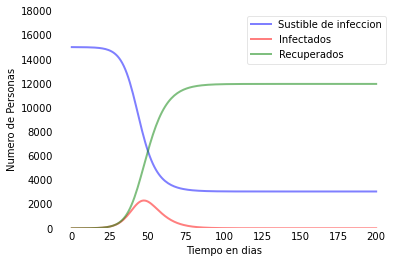

In [7]:

#Importar las librerias.
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total de la poblacion
N = 15000
# Numero Inicial de Infectados
I0 = 1
# Numero de Recuperados
R0 = 0
# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0
# Tasa de contacto, beta (nivel de repoductividad del virus) 
# La tasa de recuperación media, gamma,(1/días) Una persona se recupera en 15 dias.
beta, gamma = 0.4, 1.0/5 
# Una cuadrícula de puntos de tiempo (en días)
t = np.linspace(0, 200, 200)


# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Vector de condiciones iniciales
y0 = S0, I0, R0
# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # Obtenicion de resultados


#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Sustible de infeccion')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.set_ylim(0,N*1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

#Ro = beta/gamma
#print(Ro)

## Generar la prediccion del modelos SIR

 Se debe  estimar el valor de 
- β 
- γ

Para ajustar el modelo SIR con los casos confirmados reales (el número de personas infecciosas) del Ecuador.
 
 Para ello deben seguir el siguiente tutorial 
 https://www.lewuathe.com/covid-19-dynamics-with-sir-model.html
 


In [8]:
# Implementar y explicar la predicion del modelo SIR para el Ecuador

# 1. Implementar solo teniendo en cuenta los casos confirmados

# 2. Implementar teniendo en cuenta los casos confirmados y recuperados.

In [2]:
import numpy as np
import pandas as pd
from csv import reader
from csv import writer
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
import argparse
import sys
import json
import ssl
import urllib.request

S0: -1046 	I0: 10850 	R0: 696
2/27/20        0
2/28/20        0
2/29/20        0
3/1/20         6
3/2/20         6
3/3/20         7
3/4/20        10
3/5/20        13
3/6/20        13
3/7/20        13
3/8/20        14
3/9/20        15
3/10/20       15
3/11/20       17
3/12/20       17
3/13/20       17
3/14/20       28
3/15/20       28
3/16/20       37
3/17/20       58
3/18/20      111
3/19/20      199
3/20/20      367
3/21/20      506
3/22/20      789
3/23/20      981
3/24/20     1082
3/25/20     1173
3/26/20     1403
3/27/20     1595
3/28/20     1823
3/29/20     1924
3/30/20     1962
3/31/20     2240
4/1/20      2748
4/2/20      3163
4/3/20      3368
4/4/20      3465
4/5/20      3646
4/6/20      3747
4/7/20      3747
4/8/20      4450
4/9/20      4965
4/10/20     7161
4/11/20     7257
4/12/20     7466
4/13/20     7529
4/14/20     7603
4/15/20     7858
4/16/20     8225
4/17/20     8450
4/18/20     9022
4/19/20     9468
4/20/20    10128
4/21/20    10398
4/22/20    10850
Name: 97, dtype: o

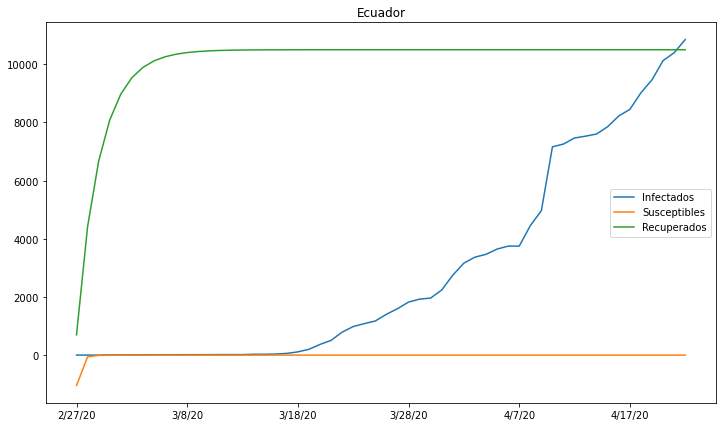

In [3]:
class Learner(object):
    def __init__(self, country, loss, start_date, predict_range,s_0, i_0, r_0):
        self.country = country
        self.loss = loss
        self.start_date = start_date
        self.predict_range = predict_range
        self.s_0 = s_0
        self.i_0 = i_0
        self.r_0 = r_0
        self.Beta = 0
        self.Gamma = 0

    def load_confirmed(self, country):
        df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]

    def extend_index(self, index, new_size):
        values = index.values
        current = datetime.strptime(index[-1], '%m/%d/%y')
        while len(values) < new_size:
            current = current + timedelta(days=1)
            values = np.append(values, datetime.strftime(current, '%m/%d/%y'))
        return values

    def predict(self, beta, gamma, data, country, s_0, i_0, r_0):
        new_index = self.extend_index(data.index, self.predict_range)
        size = len(new_index)
        def SIR(t, y):
            S = y[0]
            I = y[1]
            R = y[2]
            return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
        extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
        return new_index, extended_actual, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))
    
    def train(self):
        data = (self.load_confirmed(self.country))
        #self.i0=data[-1]
        print (data)
        optimal = minimize(loss, [0.001, 0.001], args=(data, self.s_0, self.i_0, self.r_0), method='L-BFGS-B', bounds=[(0.00000001, 0.62), (0.00000001, 0.46)])
        beta, gamma = optimal.x
        self.Beta, self.Gamma = optimal.x
        new_index, extended_actual, prediction = self.predict(beta, gamma, data, self.country, self.s_0, self.i_0, self.r_0)
        df = pd.DataFrame({'Infectados': extended_actual, 'Susceptibles': prediction.y[0], 'Recuperados': prediction.y[2]}, index=new_index)
        fig, ax = plt.subplots(figsize=(12, 7))
        ax.set_title(self.country)
        df.plot(ax=ax)
        print(f"\n beta={beta:.8f}, gamma={gamma:.8f}, R0:{(beta/gamma):.8f}")
        
contadiadosA = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
contadiadosA = contadiadosA[contadiadosA['Country/Region'] == 'Ecuador'].iloc[0].loc[:]

def loss(point, data, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    return np.sqrt(np.mean((solution.y[1] - data)**2))

N=10500
i0=contadiadosA[-1]
r0=696
s0=N - i0 - r0
print('S0:',s0,'\tI0:',i0,'\tR0:',r0)
learner = Learner('Ecuador', loss, '2/27/20', 50, s0, i0, r0)
learner.train()


 beta=0.00002208, gamma=0.00916192, R0:0.00241037


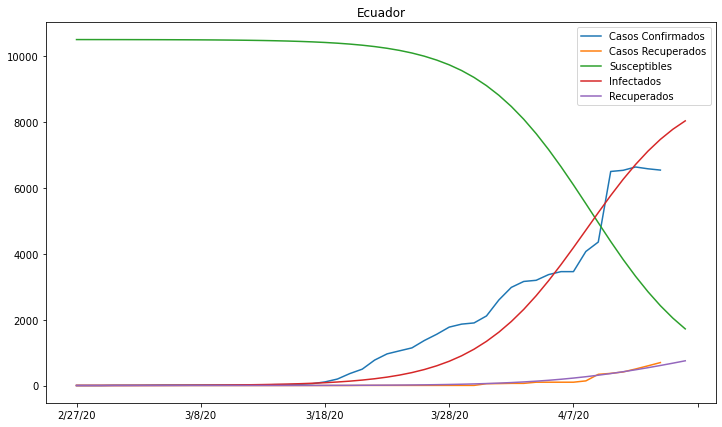

In [26]:
class Learner(object):
    def __init__(self, country, loss, start_date, predict_range,s_0, i_0, r_0):
        self.country = country
        self.loss = loss
        self.start_date = start_date
        self.predict_range = predict_range
        self.s_0 = s_0
        self.i_0 = i_0
        self.r_0 = r_0
        self.Beta = 0
        self.Gamma = 0

    def load_confirmed(self, country):
        df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]


    def load_recovered(self, country):
        df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]

    def load_dead(self, country):
        df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
        country_df = df[df['Country/Region'] == country]
        return country_df.iloc[0].loc[self.start_date:]
    
    def extend_index(self, index, new_size):
        values = index.values
        current = datetime.strptime(index[-1], '%m/%d/%y')
        current = current + timedelta(days=9)
        while len(values) < new_size:
            current = current + timedelta(days=1)
            values = np.append(values, datetime.strftime(current, '%m/%d/%y'))
        return values

    def predict(self, beta, gamma, data, recovered, death, country, s_0, i_0, r_0):
        new_index = self.extend_index(data.index, self.predict_range)
        size = len(new_index)
        def SIR(t, y):
            S = y[0]
            I = y[1]
            R = y[2]
            return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
        extended_actual = np.concatenate((data.values, [None] * (size - len(data.values))))
        extended_recovered = np.concatenate((recovered.values, [None] * (size - len(recovered.values))))
        extended_death = np.concatenate((death.values, [None] * (size - len(death.values))))
        return new_index, extended_actual, extended_recovered, extended_death, solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1))


    def train(self):
        recovered = self.load_recovered(self.country)
        death = self.load_dead(self.country)
        data = (self.load_confirmed(self.country) - recovered - death)
        
        optimal = minimize(loss, [0.001, 0.001], args=(data, recovered, self.s_0, self.i_0, self.r_0), method='L-BFGS-B', bounds=[(0.00000001, 0.7529), (0.00000001, 0.544)])
        beta, gamma = optimal.x
        new_index, extended_actual, extended_recovered, extended_death, prediction = self.predict(beta, gamma, data, recovered, death, self.country, self.s_0, self.i_0, self.r_0)
        df = pd.DataFrame({'Casos Confirmados': extended_actual, 'Casos Recuperados': extended_recovered, 'Susceptibles': prediction.y[0], 'Infectados': prediction.y[1], 'Recuperados': prediction.y[2]}, index=new_index)
        fig, ax = plt.subplots(figsize=(12, 7))
        ax.set_title(self.country)
        df.plot(ax=ax)
        print(f"\n beta={beta:.8f}, gamma={gamma:.8f}, R0:{(beta/gamma):.8f}")

contagiados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
contagiados = contagiados[contagiados['Country/Region'] == 'Ecuador'].iloc[0].loc[:]
def loss(point, data, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    return np.sqrt(np.mean((solution.y[1] - data)**2))


def loss(point, data, recovered, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    l1 = np.sqrt(np.mean((solution.y[1] - data)**2))
    l2 = np.sqrt(np.mean((solution.y[2] - recovered)**2))
    alpha = 0.1
    return alpha * l1 + (1 - alpha) * l2
N=10500
i0=1
r0=0
s0=N  - i0 - r0

learner = Learner('Ecuador', loss, '2/27/20', 50, s0, i0, r0)
learner.train()


## Calculos de incidencia

Para obtener metricas de incidencia se debe calcular la tasa de prevalencia, incidencia y la relacion, para esto leer y obtener estos datos con la ultima lectura.

https://www.paho.org/hq/index.php?option=com_content&view=article&id=14402:indicadores-de-salud-aspectos-conceptuales-y-operativos-seccion-2&catid=9894&limitstart=2&Itemid=101&lang=es

**Ecuador** <br/>
casos anteriores: 4965 <br/>
Casos nuevos:7557-4965=2292 <br/>
muestra: 22649 <br/>
periodo de tiempo: 2 dias, 48 horas  --> 09/04/2020-11/04/2020 <br/>

total de casos positivos: 7529 <br/>
poblacion total: 14 483 499 <br/>
tiempo: 47 días, 1056 horas --> 27/02/2020-14/04/2020

In [20]:
# Implementar
def incidencia(casosNP, muestra, periodo):
    return (casosNP/muestra)*pow(10, periodo) 


def prevalencia(casosP, poblacionTotal, tiempo):
    return (casosP/poblacionTotal)*pow(10, tiempo) 

def relacionPI(indicencia, duracion):
    return incidencia*duracion

incidencia=incidencia(2292,22649,2)
print('Tasa de incidencia:', incidencia)
    
prevalencia=prevalencia(7529,14483499,5)
print('Tasa de prevalencia:', prevalencia)

relacionPI=relacionPI(incidencia,3)
print('RelaciónPI:',relacionPI )

    

Tasa de incidencia: 10.119652081769615
Tasa de prevalencia: 51.98329492065418
RelaciónPI: 30.358956245308846


## Analisis
El modelo SIR, que realiza predicciones con la tasa de contagios a principios de abril; el teorema de Bayes, que ayuda a actualizar la probabilidad de que se extienda COVID-19 con nuevos datos; y la teoría de juegos, que nos habla de sacrificar el beneficio individual por el bien común para vencer a este enemigo invisible.
La enfermedad COVID-19 se ha extendido por el mundo, los países a los que ha llegado la pandemia han tomado medidas drásticas para aplanar sus curvas de infectados diarios, es decir, bajar y retrasar su tasa de contagio lo máximo posible con el fin de evitar que colapsen los sistemas salud. Detrás de esas gráficas hay modelos matemáticos que recogen las características de los brotes epidémicos y permiten realizar predicciones. El modelo SIR sin duda es el mas utilzado en diferentes países para realizar estos análisis.

## Conclusiones
Como se puede obeserva en las graficas, debido a las medidas que ha tomando el país es notorios los casos suseptibles han ido diminuyedo, sin embargo por no contar con las precauciones necesario desde el primer caso en el país el número de infectados crece rápidamente y número de personas que se recuperan es algo bajo ya que el país no cuenta con la medicina, las instalaciones para afrontar este tipo de pandemias. Debido a la poca información que presenta el país  sobre el avance de esta enfermedad y considerando que no se esta tomando el número de población adecuado, no se puede calcular un dato por lo menos algo cerca de cantidad de brotes que puede ocasionar una personas solo al tener contacto con los demás , entonces por esta razón considero que el valor de Beta es un valor poco acertado. Y el valor de gamma puede tener cierta similitud con el porcentaje de persona que se recuperan ya que en Ecuador es un número bien bajo. 


## Opinion
Es evidente que en nuestro país el brote de contagiados crece, a pesar de las medidas tomadas por el estado ecuatoriano, el número de recuperados es un número pequeño, si comparamos con la tasa de contagiados.Y esto se debe a que  el gobierno, primero no nos informa con toda la verdad sobre la situación, no actuó opotunamente ni acertadamente, por lo tanto el virus se propago en diferentes ciudades del país. Además, se debe resaltar la falta de responsabilidad, conciencia e ignoracia de los ciudadanos, hace que Ecuador se posicione como uno de los lugares con la mayor tasa de contagios a nivel mundial. 

# Referencias:
- https://www.agenciasinc.es/Reportajes/Un-modelo-un-teorema-y-teoria-de-juegos-contra-el-coronavirus
- https://rpubs.com/dsfernandez/422937
- https://towardsdatascience.com/modelling-the-coronavirus-epidemic-spreading-in-a-city-with-python-babd14d82fa2